# Comparison between Rayleigh-Sommerfeld (RS) and WPM Propagation Method (WPM)

In [5]:
from matplotlib import rcParams
rcParams['figure.dpi']=250

In [6]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X


**RS**

In [7]:
length = 150 * um
wavelength = 1 * um
x0 = np.linspace(-length / 2, length / 2, 1024)
z0 = np.linspace(2 * um, 500 * um, 512)

# source
f1 = Scalar_source_X(x0, wavelength)
f1.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0 * degrees)

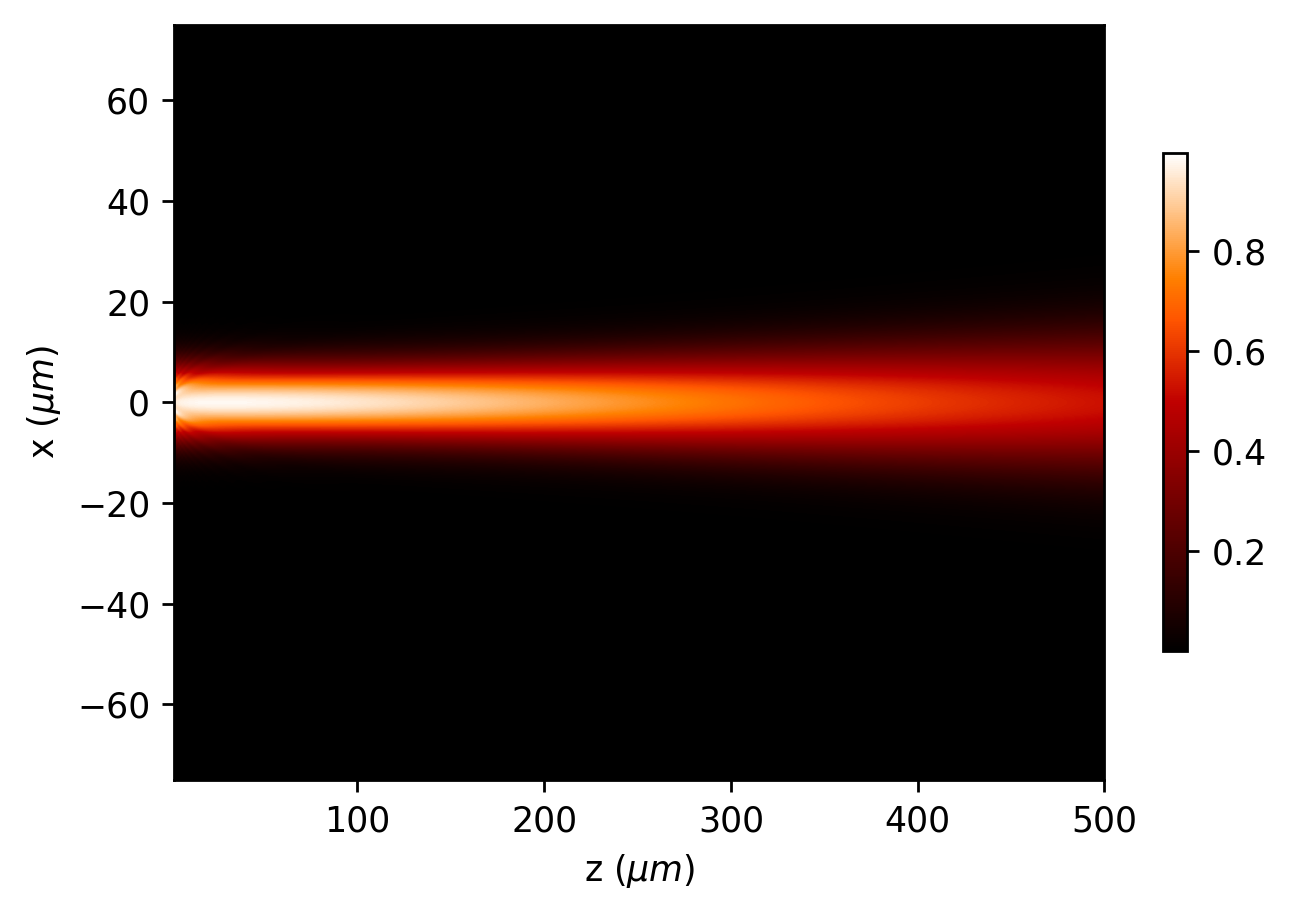

In [8]:
u_rs = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u_rs.incident_field(f1)
u_rs.RS()
u_rs.draw(kind='intensity', logarithm=False, colorbar_kind='vertical');

**WPM**

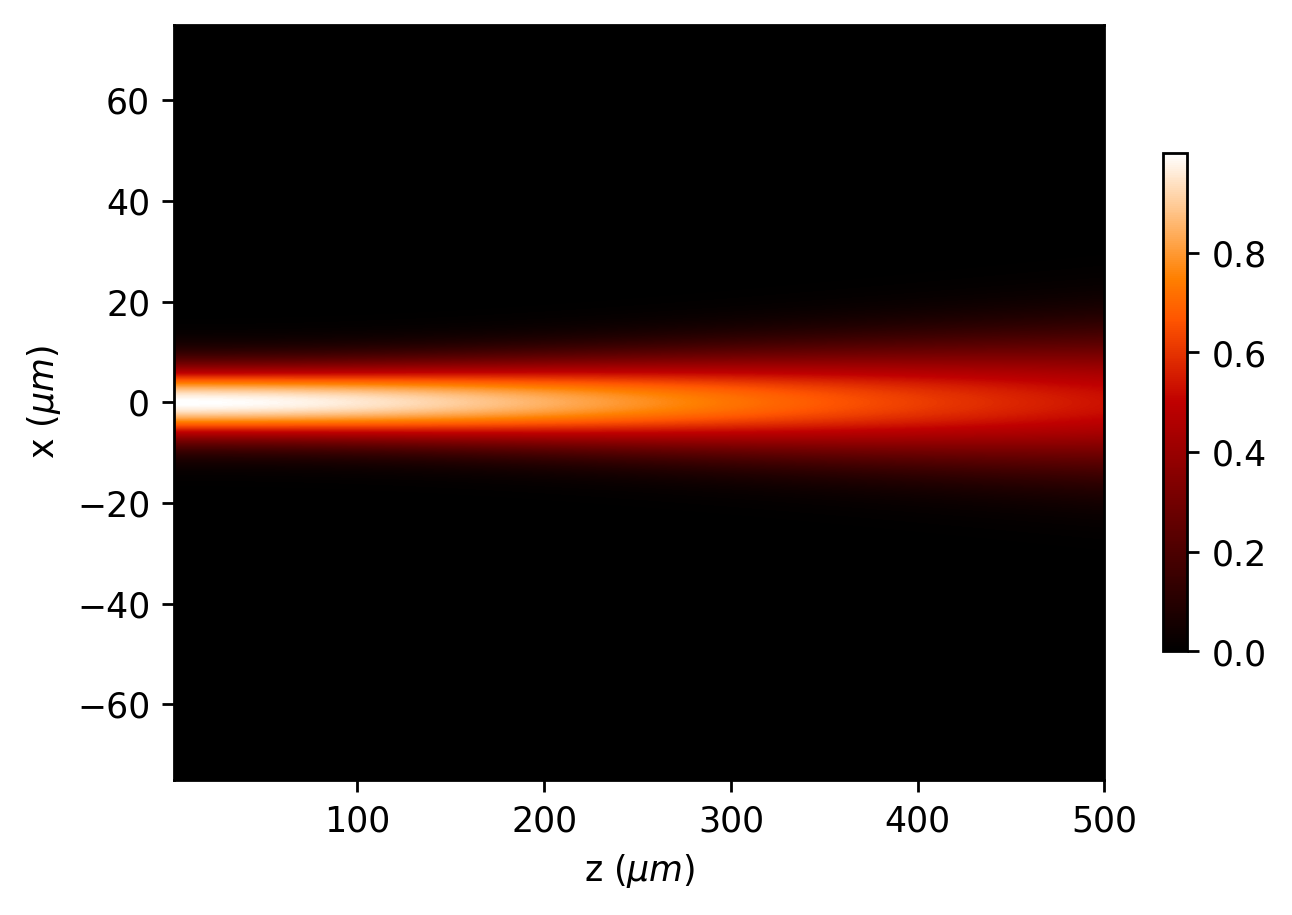

In [9]:
u_wpm = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u_wpm.incident_field(f1)
u_wpm.WPM(verbose=False)
u_wpm.draw(kind='intensity', logarithm=False, normalize='intensity', colorbar_kind='vertical');

**Differences**

Here we show the relative difference between BPM and RS

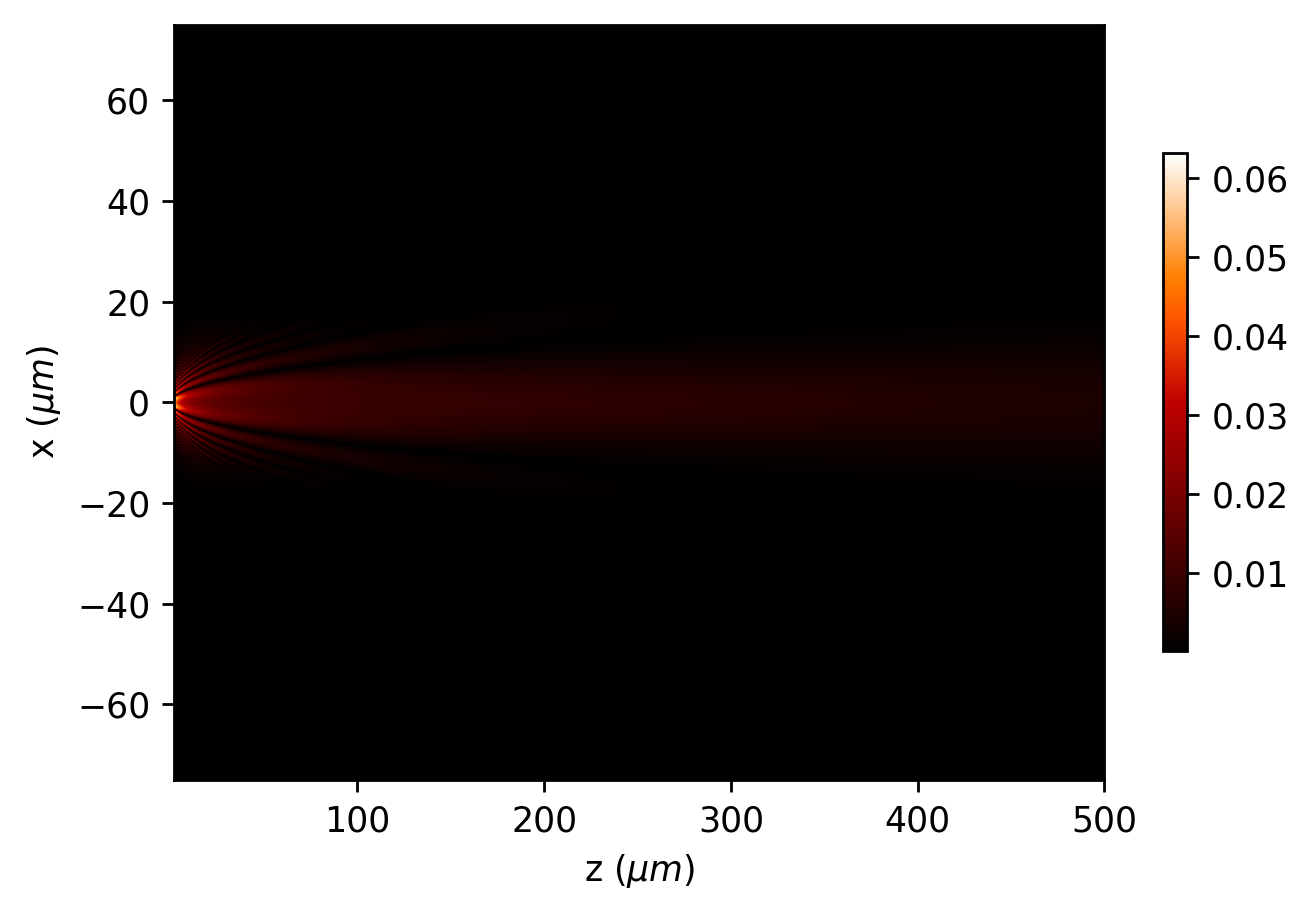

In [10]:
u_diff = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u_diff.u=np.sqrt(np.abs(np.abs(u_rs.u)**2-np.abs(u_wpm.u)**2))
u_diff.draw(kind='intensity', logarithm=False, colorbar_kind='vertical');

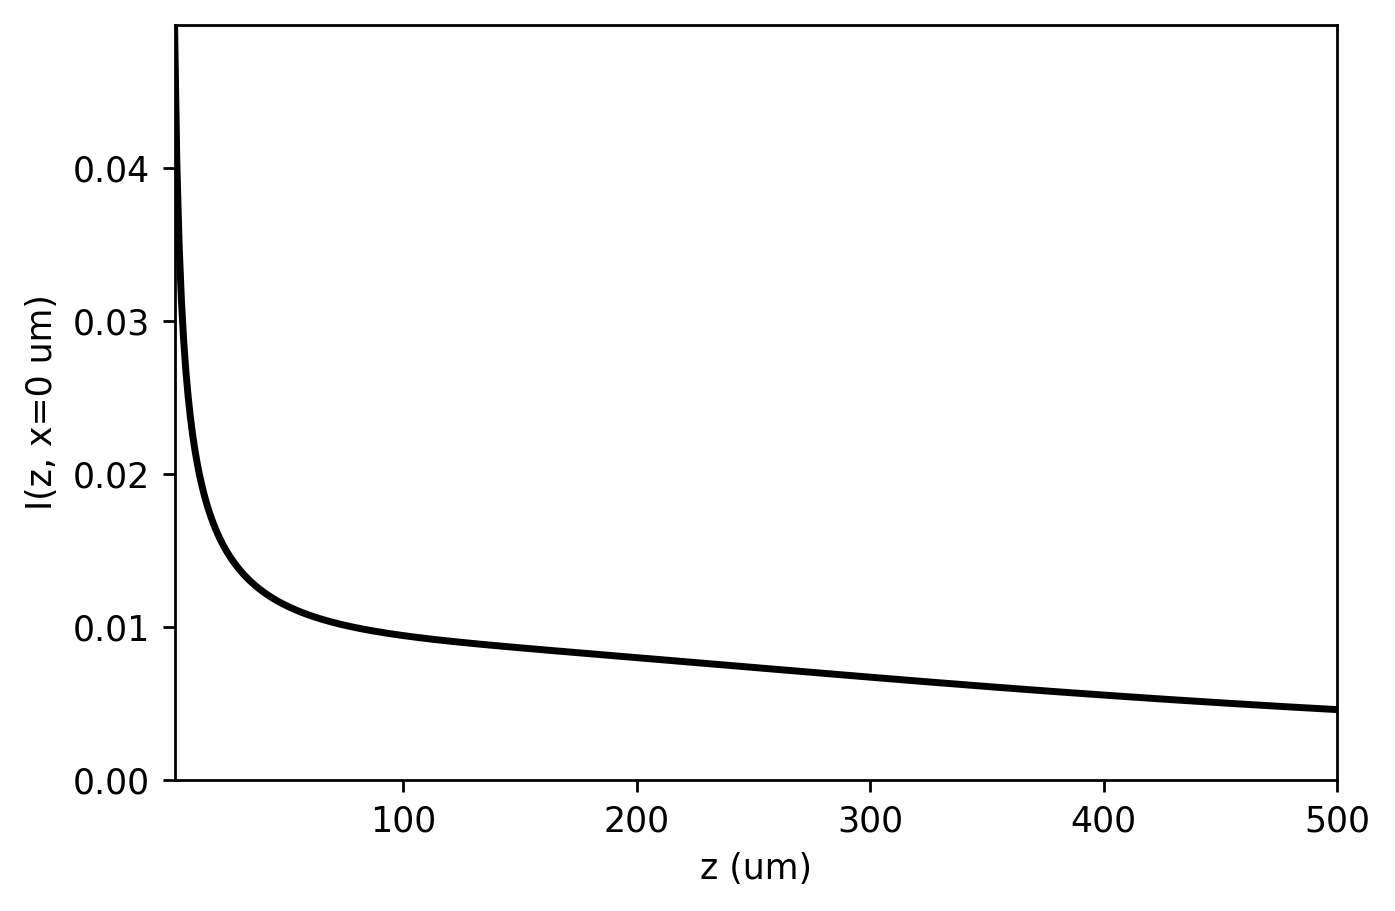

In [11]:
profile_error=u_diff.profile_longitudinal();
plt.ylim(ymin=0)